<a href="https://colab.research.google.com/github/amruthvkbhat-creator/MachineLearning/blob/main/ML_KNN_DecisionTree_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import tree

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#step 2 : load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.data.csv',  header=None,
                   names=["sepal_length", "sepal_width", "petal_length", "petal_width", "variety"])

In [24]:
#print first 10 rows of data
print(data.head(10))

x= data.drop("variety", axis=1)
y = data["variety"]

   sepal_length  sepal_width  petal_length  petal_width      variety
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [31]:
#Step 3 : split the data in training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
#Step 4: create a decision tree classifier and train it on training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
#Step 5 : evaluate the model on testing data
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"/Accuracy: {accuracy:.2f}")

/Accuracy: 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

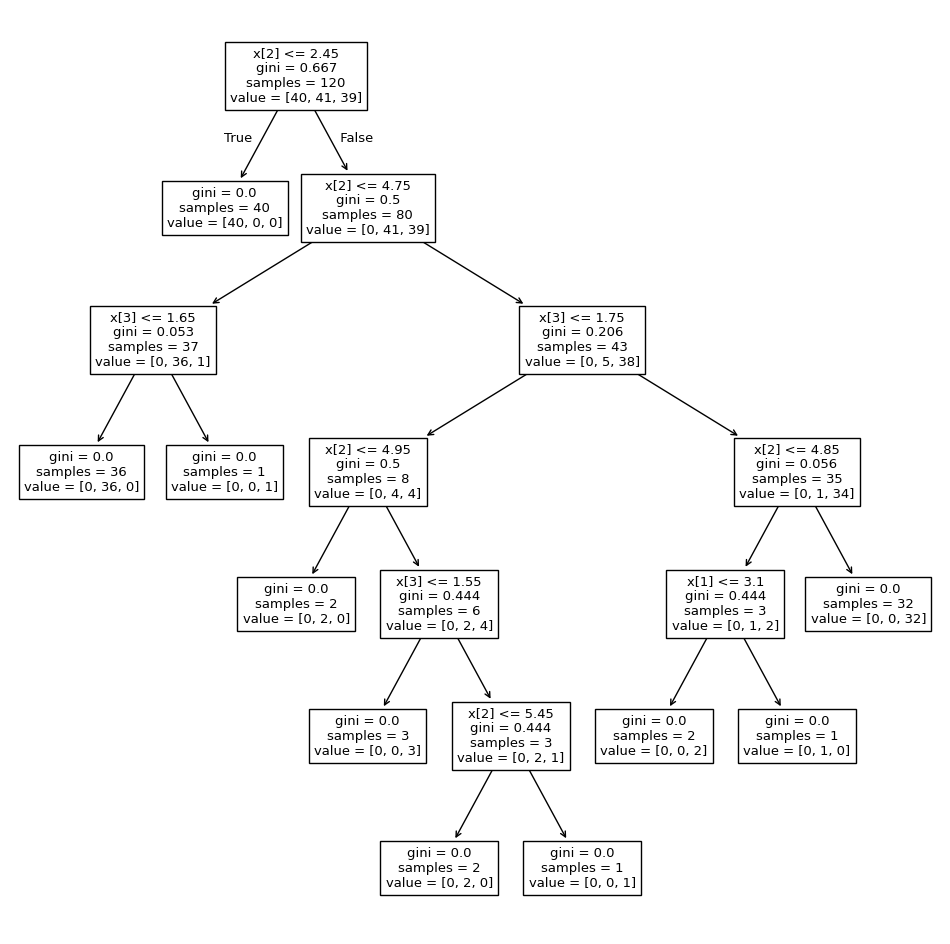

In [39]:
#Step 6 : Visualize the Decision Tree
plt.figure(figsize =(12,12))
tree.plot_tree(clf)

In [41]:
#print the text representation of decision tree
tree_rules = export_text(clf,feature_names=list(x.columns))
print("decision tree rules", tree_rules)

decision tree rules |--- petal_length <= 2.45
|   |--- class: Iris-setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- petal_width <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal_width >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- petal_length >  4.95
|   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |--- petal_length <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- petal_length >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- sepal_width <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- sepal_width >  3.10
|   |   |   |   | 